# Perceptron

###### Author @junzhaochen99

In machine learning, the perceptron is an algorithm for supervised learning binary classifiers.
A binary classifier is a function which can decide whether or not an input,
represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier,
i.e. a classification algorithm that makes its predictions based on a linear predictor function combining
a set of weights with the feature vector. A perceptron represents a binary linear classifier that maps
a set of training examples (of $n$ dimensional input vectors) onto binary output values using
a $n-1$ dimensional hyperplane.

----

## Ⅰ. Algorithm

### i. Binary Classifier
Input Vector Space $X\subset R^{n}$

Output Binary Space $Y = \{-1,1\}$

Mapping $f:\mathbf{x} \rightarrow y$

For any given $\mathbf{x}\in X$, $f(x) = sign(\mathbf{wx}+b)$,
where $\mathbf{w}$ is the real-valued weights, $\mathbf{wx}$ is the dot product
$\sum\limits_{i=1}^{n}w^{(i)}x^{(i)}$, and $b$ is the bias. The value of $f(\mathbf{x})$
(0 or 1) is used to classify $\mathbf{x}$ as either a positive or a negative instance,
in the case of a binary classification problem.

### ii. Stohastic Gradient Descending
Loss funtion is evaluated as
$L(\mathbf{w},b)=-\sum\limits_{\mathbf{x_{\mathit{i}}}\in X}y_{i}(\mathbf{wx_{\mathit{i}}}+b)$.

Partial gradiant with respect to $\mathbf{w}$ and $b$ is then given by

$\nabla_\mathbf{w} L = -\sum\limits_{\mathbf{x_{\mathit{i}}}\in X}y_{i}\mathbf{x_{\mathit{i}}}$,


$\nabla_b L = -\sum\limits_{\mathbf{x_{\mathit{i}}}\in X}y_{i}$.

Set a learning rate, determined as $\eta(0<\eta≤1)$.

Once a incorrect instance is wrongly classified, which means $f(\mathbf{x_{\mathit{i}}}) \neq y_{i}$,
update $\mathbf{w}$ and $b$ using iterative assignments as follow:

$\mathbf{w} \leftarrow \mathbf{w} + \eta y_{i} \mathbf{x_{\mathit{i}}}$,

$b \leftarrow b + \eta y_{i}$.

### iii. Hyperlane
A perceptron represents a binary linear classifier that maps
a set of training examples (of $n$ dimensional input vectors) onto binary output values using
a $n-1$ dimensional hyperplane.

If $n=2$, we can get a 1-D hyperlane with learned $\mathbf{w}=(w^{(1)},w^{(2)})$ and $b$, which is a straight line,
evaluated by  $x^{(2)} = -\frac{w^{(1)}}{w^{(2)}}x^{(1)} - \frac{b}{w^{(2)}}$.
Then the slope of this line and y-intercept is given as $-\frac{w^{(1)}}{w^{(2)}}$, $-\frac{b}{w^{(2)}}$.

## Ⅱ. Implemantation


In [3]:
# Import librabries and Dataset
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

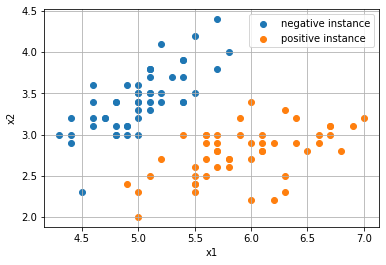

In [4]:
# Generate Dataset using Iris from Scikit-learn
iris = load_iris()
X = iris.data[0:100,0:2] #100 2-d instance vectors
Y = np.asarray([[1] if label == 1 else [-1] for label in iris.target[0:100]]) #True label of each instance input
# Dataset of shape(100,3). Each instance element is represented by pair(x1, x2, y=label).
dataset = np.concatenate((X,Y), axis=1)
# Visualize instance points.
plt.figure()
plt.scatter(X[0:50,0],X[0:50,1],label='negative instance')
plt.scatter(X[50:100,0],X[50:100,1],label='positive instance')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()
dataset

In [5]:
# Define Perceptron.
class Perceptron:
    def __init__(self,w=None,b=None):
        if w is None : #Weight vector
            self.w = np.ones(X.shape[1])
        else:
            self.w = w
        if b is  None: #Bias
            self.b = 0
        else:
            self.b = b
        self.eta = 0.1 # Learning rate, 0<eta<=1

    def multiTest(self,dataset,multi_eta=[0.1]):
        CNTs_falseClsf = [] # Counting list indexing false classifications each epoch.
        VARs_b = [] # List of b
        VARs_w1 = [] # List of weight1
        VARs_w2 = [] # List of weight2
        for eta in multi_eta:
            self.w = np.ones(X.shape[1])
            self.b = 0
            cnts_falseClsf, var_w1, var_w2, var_b = self.sgd(dataset,eta)
            CNTs_falseClsf.append(cnts_falseClsf)
            VARs_b.append(var_b)
            VARs_w1.append(var_w1)
            VARs_w2.append(var_w2)
        return CNTs_falseClsf, VARs_w1, VARs_w2, VARs_b

    def f(self,x): #Mapping function
        return np.dot(x,self.w) + self.b

    def sgd(self,dataset,eta=0.1): # dataset: {ndarray: (100,3)}
        self.eta = eta;
        X = dataset[:,0:2] # Input instance vectors
        Y = dataset[:,2] # Labels
        num_epoch = 2000 # Number of times for training epochs
        cnts_falseClsf = [] # Counting list indexing false classifications each epoch.
        var_b = [] # List of b
        var_w1 = [] # List of weight1
        var_w2 = [] # List of weight2

        for epoch in range(num_epoch):
            cnt_falseClsf = 0; # Counting of false classifications at this epoch.
            for idx in range(dataset.shape[0]): # For every instance in dataset
                x = X[idx] # Instance 2-d vector
                y = Y[idx] # True label
                if y * self.f(x) < 0: # Incorrect classification
                    # Update w and b, and increase 1 falsehood.
                    self.w = self.w + self.eta*np.dot(y,x)
                    self.b = self.b + self.eta*y
                    cnt_falseClsf += 1
            cnts_falseClsf.append(cnt_falseClsf)
            var_w1.append(self.w[0])
            var_w2.append(self.w[1])
            var_b.append(self.b)
        return cnts_falseClsf, var_w1, var_w2, var_b

Try different $\eta$, see what happens.

In [6]:
testEta = [0.1,0.5,0.7]
testModel = Perceptron()
CNTs_falseClsf, VARs_w1, VARs_w2, VARs_b \
    = testModel.multiTest(dataset,testEta)
slope = [] # The slope of the hyperplane, given by -w1/w2.
intercept = [] # The y-intercept of the hyperplane, given by -b/w2\
for idx in range(len(testEta)):
    slope.append([])
    intercept.append([])
    for idy in range(len(VARs_w1[idx])):
        slope[idx].append(-VARs_w1[idx][idy]/VARs_w2[idx][idy])
        intercept[idx].append(-VARs_b[idx][idy]/VARs_w2[idx][idy])

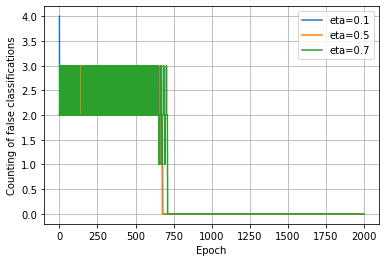

In [7]:
# Visualize counting of false classifications each epoch.
plt.figure()
for idx in range(len(testEta)):
    plt.plot(CNTs_falseClsf[idx],label='eta='+str(testEta[idx]))
plt.xlabel('Epoch')
plt.ylabel('Counting of false classifications')
plt.legend()
plt.grid()

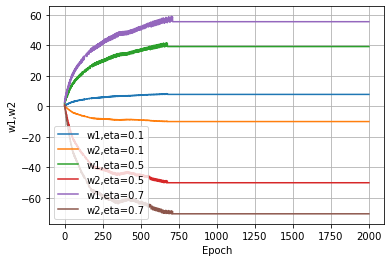

In [8]:
# Visualize weight vector.
plt.figure()
for idx in range(len(testEta)):
    plt.plot(VARs_w1[idx],label='w1,eta='+str(testEta[idx]))
    plt.plot(VARs_w2[idx],label='w2,eta='+str(testEta[idx]))
plt.xlabel('Epoch')
plt.ylabel('w1,w2')
plt.legend()
plt.grid()

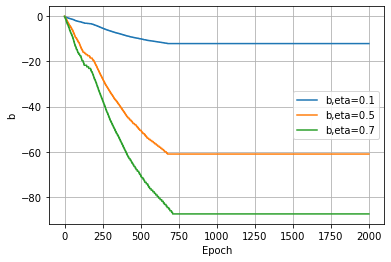

In [9]:
# Visualize bias.
plt.figure()
for idx in range(len(testEta)):
    plt.plot(VARs_b[idx],label='b,eta='+str(testEta[idx]))
plt.xlabel('Epoch')
plt.ylabel('b')
plt.legend()
plt.grid()

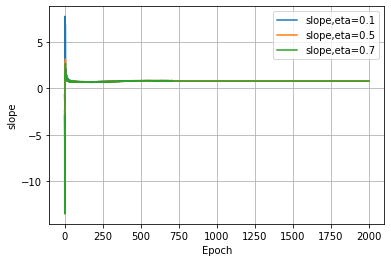

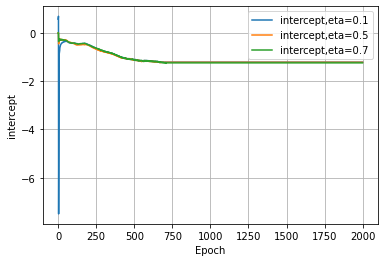

In [152]:
# Visualize the slope and intercept of the hyperplane.
plt.figure()
for idx in range(len(testEta)):
    plt.plot(slope[idx],label='slope,eta='+str(testEta[idx]))
plt.xlabel('Epoch')
plt.ylabel('slope')
plt.legend()
plt.grid()
plt.figure()
for idx in range(len(testEta)):
    plt.plot(intercept[idx],label='intercept,eta='+str(testEta[idx]))
plt.xlabel('Epoch')
plt.ylabel('intercept')
plt.legend()
plt.grid()

We can find that even though the training process runs with different $\eta$, the $\textbf{Perceptron}$ hyperplane
determined by a pair of (slope,intercept), always converges to a existing limit after large-enough training epochs,
if it meets certain conditions.

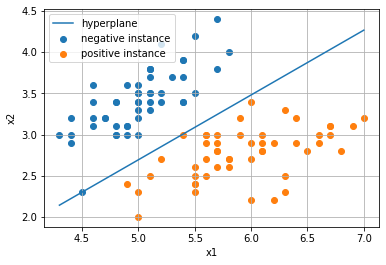

In [153]:
# Scatter input instance and draw the learned hyperplane.
w1,w2 = testModel.w[0], testModel.w[1]
b = testModel.b
x1 = np.linspace(min(X[:,0]),max(X[:,0]),100)
x2 = -(w1*x1+b)/w2 # The hyperplane
plt.figure()
plt.scatter(X[0:50,0],X[0:50,1],label='negative instance')
plt.scatter(X[50:100,0],X[50:100,1],label='positive instance')
plt.plot(x1,x2,label='hyperplane')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()


